In [472]:
import pandas as pd
import numpy as np
#data = pd.read_csv('data/Compressed Mortality, 2016.txt', sep=" ", header=None)
#data.columns = ["a", "b", "c", "etc."]
#data = pd.read_fwf('data/Compressed Mortality, 2016.txt')


from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
% matplotlib inline

import glob
import os
import math

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import preprocessing


In [473]:
# Compressed Mortality

# get a list of the data files the direction
onlyfiles = [f for f in listdir('data/Compressed Mortality/') if isfile(join('data/Compressed Mortality/', f))]
print(onlyfiles)

# for each txt file...
for i in np.arange(len(onlyfiles)):

    data_temp = pd.read_table('data/Compressed Mortality/' + onlyfiles[i], header='infer', index_col=None,  names=('Notes', 'County', 'County Code', 'Deaths', 'Population', 'Crude Rate'))
    #data_temp.drop(data_temp.index[0])
    data_dropped = data_temp.iloc[1:] #Remove the first row because it's the files's header
    data_dropped['County Code'] = pd.to_numeric(data_dropped['County Code']) # Make the zipcode a float instead of a string
    #print(data_dropped.head(5))

    data_dropped.insert(0, 'year', int(onlyfiles[i][-8:-4])) # Add the year as a column
#print(data.head)
    if i == 0:
        data = data_dropped
    else:
        data = pd.concat([data, data_dropped]) # add each year's text file to the overall dataframe


data_sorted = data.sort_values(by=['County Code', 'year']) # put in order

#print(data_sorted.head(5))

data_mortality = data_sorted


data_mortality.set_index(['County Code', 'year'], inplace=True, drop =False)


temp = np.zeros((data_mortality.shape[0],1))
unreliable = np.zeros((data_mortality.shape[0],1))
for i in range(data_mortality.shape[0]):
    
    
    #print(data['Crude Rate'].iloc[i])
    #s = re.findall('\d*\.?\d+', data['Crude Rate'].iloc[i])
    try:
        temp[i] = float(data_mortality['Crude Rate'].iloc[i].split()[0])
        unreliable[i] = 1
    except:
        temp[i] = float(data_mortality['Crude Rate'].iloc[i])
        unreliable[i] = 0
        
data_mortality['Crude Rate'] =temp


['Compressed Mortality, 1999.txt', 'Compressed Mortality, 2000.txt', 'Compressed Mortality, 2001.txt', 'Compressed Mortality, 2002.txt', 'Compressed Mortality, 2003.txt', 'Compressed Mortality, 2004.txt', 'Compressed Mortality, 2005.txt', 'Compressed Mortality, 2006.txt', 'Compressed Mortality, 2007.txt', 'Compressed Mortality, 2008.txt', 'Compressed Mortality, 2009.txt', 'Compressed Mortality, 2010.txt', 'Compressed Mortality, 2011.txt', 'Compressed Mortality, 2012.txt', 'Compressed Mortality, 2013.txt', 'Compressed Mortality, 2014.txt', 'Compressed Mortality, 2015.txt', 'Compressed Mortality, 2016.txt']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [474]:
# perscrption drugs

# Get all the relevant csv files
onlyfiles = [f for f in listdir('data/Prescriptions/') if isfile(join('data/Prescriptions/', f))]

print(onlyfiles)

# For all the files...
for i in np.arange(len(onlyfiles)):
    # load the CSV
    data_temp = pd.read_csv('data/Prescriptions/' + onlyfiles[i], index_col=None,  names=('State', 'County Code', 'Opioid Perscription Rate'))
    
    # Insert the year as a column in the dataframe
    data_temp.insert(0, 'year', int(onlyfiles[i][-8:-4]))
#print(data.head)
    if i == 0:
        data = data_temp
    else:
        data = pd.concat([data, data_temp]) # Add to the overall dataframe


data_sorted = data.sort_values(by=['County Code', 'year'])


data_perscriptions = data_sorted

data_perscriptions.set_index(['County Code', 'year'], inplace=True, drop =False)

['rxrate_2006.csv', 'rxrate_2007.csv', 'rxrate_2008.csv', 'rxrate_2009.csv', 'rxrate_2010.csv', 'rxrate_2011.csv', 'rxrate_2012.csv', 'rxrate_2013.csv', 'rxrate_2014.csv', 'rxrate_2015.csv', 'rxrate_2016.csv']


In [475]:
# county health statistics

def create_fips_code(df):
    fips_code = []
    for i in range(df['statecode'].shape[0]):
        # combine the statecode and countycode to create the fips_code
        string = '{:d}{:03d}'.format(df['statecode'].iloc[i], df['countycode'].iloc[i])
        fips_code.append(int(string)) 
    return fips_code

# load all data into a single dataframe
data_dir = 'data/county health rankings'
file_wildcard = os.path.join(data_dir, '*.csv')
for i, filepath in enumerate(reversed(glob.glob(file_wildcard))):
    year = filepath.split('/')[-1].split('\\')[-1].split(' ')[0]
    print(i, filepath, year)
    
    # load the data
    data = pd.read_csv(filepath)
    # convert all columns to lower case
    data.columns = map(str.lower, data.columns)
    # calculate the fips_code and insert as 1st column
    data.insert(loc=0, column='County Code', value=create_fips_code(data))
    # insert the year as the 2nd column
    data.insert(loc=1, column='year', value=int(year))
    #
    if i == 0:
        df = data
        orig_columns = data.columns
    else:
        df = pd.concat([df, data])
    print(data.shape)
    
print(df.shape)

data_health_statistics = df
#data_health_statistics.rename(columns = {'5-digit fips code':'County Code'}, inplace = True)


data_health_statistics = data_health_statistics.sort_values(by=['County Code', 'year'])

data_health_statistics.set_index(['County Code', 'year'], inplace=True, drop =False)

0 data/county health rankings\2017 CHR analytic data.csv 2017
(3186, 358)
1 data/county health rankings\2016 CHR analytic data.csv 2016
(3191, 356)
2 data/county health rankings\2015 CHR analytic data.csv 2015
(3191, 331)
3 data/county health rankings\2014 CHR analytic data.csv 2014
(3191, 326)
(12759, 373)


In [476]:
# combine the three dataframes

data_temp = data_mortality.join(data_perscriptions, how ='outer', lsuffix = '_data_mortality', rsuffix = '_data_perscriptions')

data = data_temp.join(data_health_statistics, how = 'outer', lsuffix = '_data', rsuffix = '_data_health_statistics')

data.head(15)


data['year_keep'] = data.index.get_level_values('year')
# add year as a variable
# data is all three dataframes with nothing removed


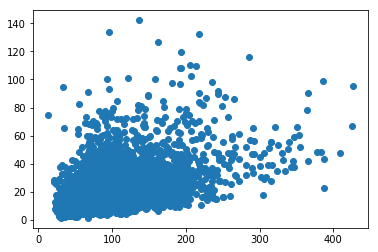

In [477]:
plt.figure()
plt.scatter(data['Opioid Perscription Rate'], data['Crude Rate'])


In [478]:
# remove rows with no response variable

print(data.shape)

null_dataframe = data.isnull()
data = data.drop(data[null_dataframe["Crude Rate"]].index, inplace=False)

#reduced_data = data.drop(data[(data['Crude Rate'] == 'nan').values].index, inplace=False)

print(data.shape)




(41002, 385)
(11798, 385)


In [479]:



#print(data.shape)##

#null_dataframe = data.isnull()
#reduced_data = data.drop(data[null_dataframe['drug overdose deaths value']].index, inplace=False)

#reduced_data = data.drop(data[(data['Crude Rate'] == 'nan').values].index, inplace=False)

#print(reduced_data.shape)





In [480]:

#remove useless features

to_remove = ['countycode', 'statecode', 'county that was not ranked', 'drug overdose deaths: modeled upper confidence interval', 'county', 'state', 'drug overdose deaths value', 'Notes','County','County Code_data_mortality','Deaths','Population','State','County Code_data_perscriptions','5-digit fips code','County Code','drug overdose deaths lower confidence interval','drug overdose deaths numerator','drug overdose deaths upper confidence interval','drug overdose deaths: modeled denominator','drug overdose deaths: modeled lower confidence interval','drug overdose deaths: modeled value']

for i in np.arange(len(to_remove)):
    data.drop(to_remove[i], axis=1, inplace = True)


In [481]:
feature_names = data.columns.values

print(data.shape)
for i in np.arange(len(feature_names)):
    if feature_names[i].find('denominator') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
    if feature_names[i].find('numerator') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
    if feature_names[i].find('confidence') != -1:
        data.drop(feature_names[i], axis=1, inplace = True)
print(data.shape)

(11798, 363)
(11798, 81)


In [482]:
print(data.columns.values)

['year_data_mortality' 'Crude Rate' 'year_data_perscriptions'
 'Opioid Perscription Rate' 'access to exercise opportunities value'
 'adult obesity value' 'adult smoking value'
 'air pollution - particulate matter value'
 'alcohol-impaired driving deaths value' 'child mortality value'
 'children eligible for free lunch value' 'children in poverty value'
 'children in single-parent households value'
 'could not see doctor due to cost value' 'dentists ratio' 'dentists value'
 'diabetes value' 'diabetic screening value' 'disconnected youth value'
 'drinking water violations value' 'driving alone to work value'
 'excessive drinking value' 'firearm fatalities value'
 'food environment index value' 'food insecurity value'
 'frequent mental distress value' 'frequent physical distress value'
 'health care costs value' 'high school graduation value'
 'hiv prevalence rate value' 'homicide rate value'
 'inadequate social support value' 'income inequality value'
 'infant mortality value' 'injury de

In [483]:

# Make the weird entires in the this features more normal
drinking_water = data['drinking water violations value'].values
drinking_water[drinking_water == 'Yes'] = 1.0
drinking_water[drinking_water == 'No'] = 0.0
drinking_water[drinking_water == '.'] = 0.0

data['drinking water violations value'] = pd.to_numeric(data['drinking water violations value'])



In [484]:
# change ratios like 1:2000 into a decimal in a few variables
data.select_dtypes(include=['O'])
object_variables = ['dentists ratio', 'mental health providers ratio', 'other primary care providers ratio', 'primary care physicians ratio']

for z in np.arange(len(object_variables)):

    mh = data[object_variables[z]].values

    for i in np.arange(data.shape[0]):
        try:
            a = mh[i].find(':')
    #        print(float(mh[i][:a]))
    #        print(1.0/float(mh[i][:a]))

            mh[i] = 1.0/float(mh[i][:a])
    #        print(mh[i])
        except:
            mh[i] = mh[i]

    data[object_variables[z]] = pd.to_numeric(mh)





In [485]:
#features.select_dtypes(include=['O'])
# should be none at this point


In [486]:
# remove rows from years before 2014
print(data.shape)

years = data.index.get_level_values('year')

small_years = years < 2014.0
data = data.drop(data[small_years].index, inplace=False)

print(data.shape)

#test = data.drop(features['year'] < 2014.0,   inplace=False)



(11798, 81)
(2702, 81)


In [487]:
# drop columns that are all nan
data.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

# fill nans
data = data.apply(lambda x: x.fillna(x.median()),axis=0)

# remove the response variable from the data
response = data['Crude Rate']
features = data.drop('Crude Rate', axis=1, inplace = False)
features = features.drop('year_keep', axis=1, inplace = False)




In [488]:
# separate the data into a train and dev set

trainX, devX, trainY, devY = model_selection.train_test_split(preprocessing.scale(features), response, test_size=0.1, random_state=94305)



49.581800442373314
0.545876669876
[ 1.0714899   0.         -1.18224368  0.48315507 -0.71675027 -0.14563058
  1.56909391  0.5281327   0.35759739 -0.715691   -1.02501013  1.28554553
  0.46986148 -0.07370504 -0.          0.98321968 -0.07487327  0.16643396
  0.         -0.48866116  6.069119    5.75242058 -0.07265833 -0.62567369
 -0.65433924  0.3576255  -0.40716633  0.25729172 -0.0152603   0.75947984
 -0.75555297  6.53137718  1.30443549  2.13404982  1.80183308  0.68680451
 -1.11866174  0.00681816  0.68423996  0.         -3.20434983  0.33225171
  0.         -0.44800074 -0.43201645 -0.77348372 -0.79387783 -0.44940299
  0.         -0.89692513 -2.70229165  0.          0.07079162  0.06463021
  0.13330382  0.06966828 -0.09716006 -0.10703414 -0.09206202 -3.38792947
  6.3733485   1.3952467  -0.21371106 -0.         -0.2210549   0.32170898
  0.4165575  -1.32388882  0.0804787  -1.42119686  0.15503341 -0.17046506
 -2.16928357 -0.86165825 -0.          0.16858436  0.99569977]
Positively correlated
['year

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


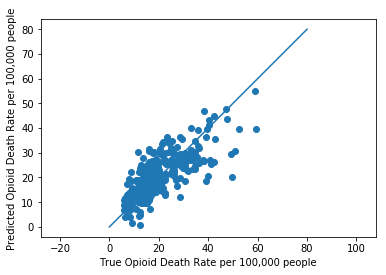

In [489]:
# fit linear regression 
lreg = linear_model.LassoCV()
lreg.fit(trainX, trainY)

pred = lreg.predict(devX)

mse = np.mean((pred - devY)**2)
print(mse)

score = lreg.score(devX,devY)
print(score)
h = plt.figure()
plt.scatter(devY.values, pred)
plt.axis('equal')
plt.plot([0, 80], [0, 80])
plt.xlabel('True Opioid Death Rate per 100,000 people')
plt.ylabel('Predicted Opioid Death Rate per 100,000 people')
print(lreg.coef_)

index_array = lreg.coef_ > 0.1

feature_names = features.columns.values

print('Positively correlated')
print(feature_names[index_array])

index_array = lreg.coef_ < -0.1
print('Negatively correlated')
print(feature_names[index_array])
plt.savefig('Lasso')



In [493]:
year_variable = data['year_keep']
year2016_index = (year_variable == 2016.0).values
print(year2016_index)

print(data.shape)
data_2016 = data[year2016_index]
print(data_2016.shape)


response_2016 = data_2016['Crude Rate']
features_2016 = data_2016.drop('Crude Rate', axis=1, inplace = False)
features_2016 = features_2016.drop('year_keep', axis=1, inplace = False)


features_2016_scale = preprocessing.scale(features_2016)


(1742, 79)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


134.62077538998975
0.352338529848
[  3.96448585e-02   6.52622490e-17  -0.00000000e+00   3.17209201e-01
  -3.60276228e-01   0.00000000e+00   1.10396509e+00   8.80733102e-02
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   1.08336157e-02   0.00000000e+00   0.00000000e+00
  -4.02207977e-01   3.63705479e-02  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   4.89429713e-01  -0.00000000e+00   6.51278358e+00
   0.00000000e+00  -2.39411331e-01   9.71679188e-01   2.60794621e-01
  -1.24201070e+00  -0.00000000e+00   0.00000000e+00   2.79336093e-01
  -2.25223426e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -1.45808919e-01  -3.05933771e-01  -2.96086991e-02  -9.97548462e-02
   0.00000000e+00  -4.81536006e-01  -1.61291791e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   3.26901985e-01


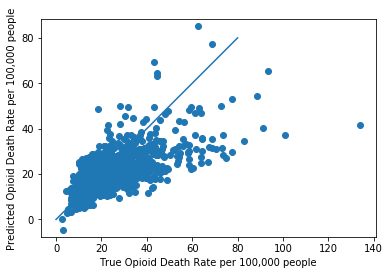

In [495]:
# Lasso on all data 

year2014_2015_index = year2016_index == False
data_2014_2015 = data[year2014_2015_index]
print(data_2014_2015.shape)


response_2014_2015 = data_2014_2015['Crude Rate']
features_2014_2015 = data_2014_2015.drop('Crude Rate', axis=1, inplace = False)
features_2014_2015 = features_2014_2015.drop('year_keep', axis=1, inplace = False)





# fit linear regression 
lreg = linear_model.LassoCV()
lreg.fit(preprocessing.scale(features_2014_2015), response_2014_2015)

         
pred = lreg.predict(features_2016_scale)

mse = np.mean((pred - response_2016)**2)
print(mse)

score = lreg.score(features_2016_scale,response_2016)
print(score)
h = plt.figure()
plt.scatter(response_2016, pred)
plt.axis('equal')
plt.plot([0, 80], [0, 80])
plt.xlabel('True Opioid Death Rate per 100,000 people')
plt.ylabel('Predicted Opioid Death Rate per 100,000 people')
print(lreg.coef_)

index_array = lreg.coef_ > 0.1

feature_names = features.columns.values

print('Positively correlated')
print(feature_names[index_array])

index_array = lreg.coef_ < -0.1
print('Negatively correlated')
print(feature_names[index_array])
plt.savefig('Lasso')

,,year_data_mortality,Crude Rate,year_data_perscriptions,Opioid Perscription Rate,access to exercise opportunities value,adult obesity value,adult smoking value,air pollution - particulate matter value,alcohol-impaired driving deaths value,child mortality value,...,social associations value,some college value,teen births value,unemployment value,uninsured adults value,uninsured children value,uninsured value,violent crime value,year,year_keep
County Code,year,,,,,,,,,,,,,,,,,,,,,
1003,2016,2016.0,15.3,2016.0,123.8,0.722,0.267,0.186,13.13,0.394,51.3,...,12.018,0.623,41.6,0.061,0.221,0.057,0.175,220.67,2016.0,2016
1009,2016,2016.0,24.3,2016.0,56.9,0.255,0.324,0.194,12.66,0.192,51.9,...,8.467,0.491,45.3,0.061,0.223,0.060,0.176,219.03,2016.0,2016
1015,2016,2016.0,13.1,2016.0,161.0,0.593,0.320,0.238,12.89,0.250,62.9,...,14.220,0.537,47.2,0.079,0.204,0.039,0.160,504.52,2016.0,2016
1049,2016,2016.0,25.4,2016.0,114.4,0.402,0.306,0.192,12.93,0.348,55.3,...,8.872,0.430,56.3,0.069,0.294,0.075,0.230,243.43,2016.0,2016
1055,2016,2016.0,14.6,2016.0,156.8,0.440,0.347,0.223,12.79,0.274,79.1,...,16.453,0.522,51.5,0.070,0.204,0.046,0.161,497.87,2016.0,2016
1073,2016,2016.0,30.3,2016.0,116.7,0.777,0.337,0.168,12.71,0.163,93.5,...,15.118,0.664,44.6,0.063,0.185,0.047,0.147,717.40,2016.0,2016
1077,2016,2016.0,11.9,2016.0,127.5,0.627,0.316,0.189,13.06,0.282,59.9,...,15.087,0.592,32.0,0.072,0.188,0.041,0.150,179.56,2016.0,2016
1095,2016,2016.0,13.7,2016.0,191.1,0.647,0.350,0.204,12.73,0.278,82.9,...,10.025,0.474,62.5,0.067,0.288,0.054,0.219,227.86,2016.0,2016
1097,2016,2016.0,15.4,2016.0,133.5,0.695,0.361,0.205,12.95,0.373,78.7,...,11.471,0.582,53.3,0.077,0.215,0.044,0.166,597.08,2016.0,2016


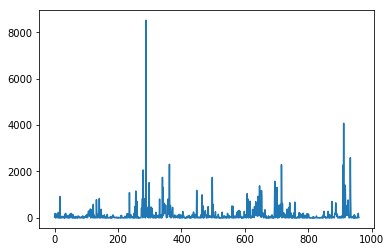

In [519]:
error = (pred - response_2016)**2

plt.figure()
plt.plot(error.values)

data_2016[error > 20]

In [538]:
county_code = data.index.get_level_values('County Code').values
two_digit_codes = np.round(county_code/1000.0)

error_by_state = np.zeros((56,2))
error_by_state[:,0] = np.arange(56)
for i in np.arange(np.max(two_digit_codes)):
    indices = np.argwhere(two_digit_codes == i)
    print(error[indices])
    average_error = np.median(error[indices])
    if not math.isnan(average_error):
        error_by_state[i,1] = average_error


[]
[[  4.17612958e+01]
 [  3.15653340e+01]
 [  1.93605190e+02]
 [  6.05883741e-03]
 [  3.63187093e+01]
 [  1.66383909e+02]
 [  9.10601340e+01]
 [  1.47480122e+02]
 [  2.77430709e+00]
 [  1.53689741e+02]
 [  6.37919477e+01]
 [  1.58850081e+01]
 [  2.36549783e+02]
 [  9.67338958e-01]
 [  8.27481483e+00]
 [  4.16917708e-01]
 [  1.16138810e+01]
 [  9.21543652e+02]
 [  2.15269904e+00]
 [  1.75763611e-01]
 [  8.69044020e+00]
 [  2.28190627e+00]
 [  7.63686405e-03]
 [  4.74533931e+01]
 [  7.05372489e+01]
 [  1.42162771e+01]
 [  4.28252906e+01]
 [  2.94008739e+01]
 [  3.04166453e+01]
 [  3.15283219e-02]
 [  9.76916812e-01]
 [  8.72664914e+01]
 [  3.38513809e-01]
 [  1.60946040e+02]
 [  3.25179683e+01]
 [  1.98354742e+02]
 [  2.26434394e+00]
 [  8.25424753e+01]
 [  3.70918008e+01]
 [  2.89499273e+01]
 [  1.45986952e+01]
 [  7.36835453e+00]
 [  4.44317678e+01]
 [  1.09248065e+02]
 [  3.35726583e+00]
 [  2.50830259e+01]
 [  3.23771440e+00]
 [  4.18940488e+00]
 [  2.00169885e+00]
 [  1.69517588e+0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [539]:
two_digit_codes = np.round(county_code/1000.0)
print(two_digit_codes)
two_digit_codes == 1.0

1.0
